In [1]:
import os
import sys

# Use the current working directory instead of __file__
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import matplotlib.pyplot as plt
import pandas as pd
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.pinopi as pnp
import classifiers.classifier as classifier

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
print(f"{q1}\n{q2}")

Qubit(ge_time=77, ro_amp=0.25, qubit_thr=[-10000, -600], RO_LO=6.6247, ro_freq=6.72739, ge_ssm=-0.1144, qubit_id=q1, ROIF=0.10268999999999995, mixer_offset_ef=6, mixer_offset_ge=2.5, IQ_angle=60, ef_time=44, ef_half_amp=1.3, ef_amp=1.5, ge_amp=1.01, RO_IF=None, ef_half_time=25, ef_ssm=-0.25684, RO_LO_pwr=16, ro_dur=5000)
Qubit(ge_time=74, ro_amp=0.45, qubit_thr=[-10000, 1900], RO_LO=6.6247, ro_freq=6.65554, ge_ssm=-0.154, qubit_id=q2, ROIF=0.030840000000000423, mixer_offset_ef=None, mixer_offset_ge=None, IQ_angle=25, ef_time=None, ef_half_amp=None, ef_amp=1, ge_amp=0.4, RO_IF=None, ef_half_time=None, ef_ssm=-0.2962, RO_LO_pwr=16, ro_dur=5000)


In [3]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
bnc.set_bnc_output(
    readout_dict["RO_LO"],
    power_dBm=readout_dict["RO_LO_pwr"],
    bnc_addr=bnc_address["target_bnc_black"],
)

num_steps = 3
reps = 50000
swap_freq= -.0194
swap_time=0.5*7/abs(swap_freq)



writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 3
Records per pattern: 50000
Buffers per acquistion: 49
DAQ samples per pattern: 8192
0, No error
Capturing 49 buffers. Press <enter> to abort
Capture completed in 15.674013 sec
Captured 49 buffers (3.126194 buffers per sec)
Captured 150528 records (9603.666972 records per sec)
Transferred 2466250752 bytes (157346479.668560 bytes per sec)


<Figure size 800x800 with 0 Axes>

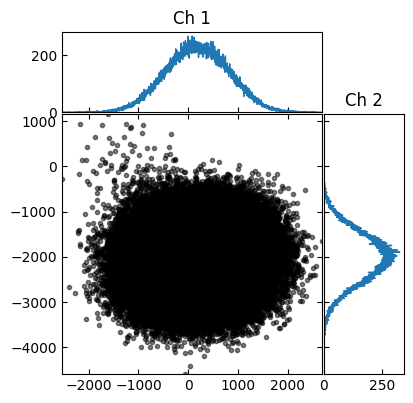

<Figure size 800x800 with 0 Axes>

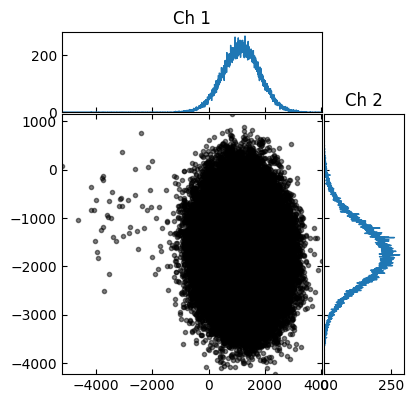

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 3
Records per pattern: 50000
Buffers per acquistion: 49
DAQ samples per pattern: 8192
0, No error
Capturing 49 buffers. Press <enter> to abort
Capture completed in 15.669670 sec
Captured 49 buffers (3.127060 buffers per sec)
Captured 150528 records (9606.328449 records per sec)
Transferred 2466250752 bytes (157390085.301885 bytes per sec)


<Figure size 800x800 with 0 Axes>

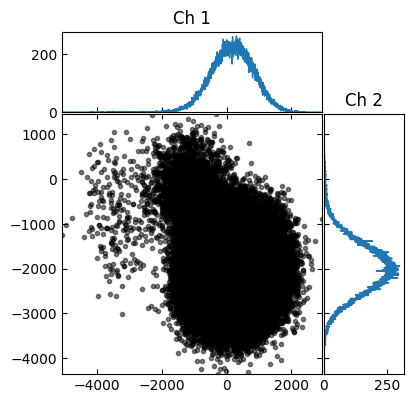

<Figure size 800x800 with 0 Axes>

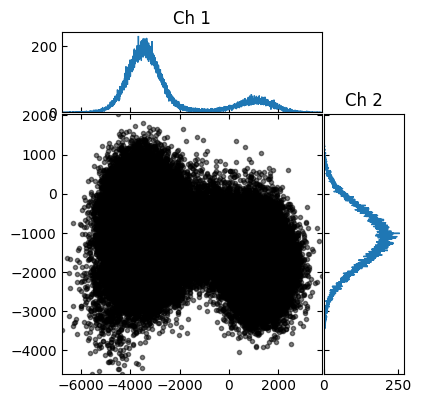

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 3
Records per pattern: 50000
Buffers per acquistion: 49
DAQ samples per pattern: 8192
0, No error
Capturing 49 buffers. Press <enter> to abort
Capture completed in 15.669883 sec
Captured 49 buffers (3.127018 buffers per sec)
Captured 150528 records (9606.198365 records per sec)
Transferred 2466250752 bytes (157387954.015887 bytes per sec)


<Figure size 800x800 with 0 Axes>

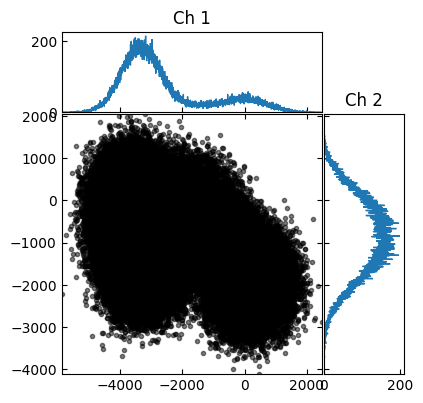

<Figure size 800x800 with 0 Axes>

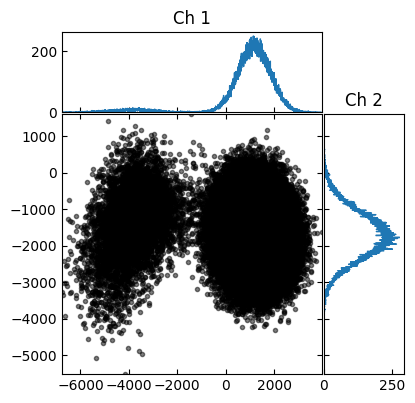

In [4]:
phase = 0
swap_amp = 1.36  
for i in range(3):
    if 0 == i:
        label = "G"
        pnp.pi_nopi_swap(
            q1,
            q2,
            general_vals_dict,
            copief=0,
            coswap=1,
            copige=0,
            num_steps=3,
            swap_freq=swap_freq,
            swap_time=swap_time,
            phase=phase,
            swap_amp=swap_amp,
        )
    elif 1 == i:
        label = "E"
        # E prep
        pnp.pi_nopi_swap(
            q1,
            q2,
            general_vals_dict,
            copief=0,
            coswap=1,
            copige=1,
            num_steps=3,
            swap_freq=swap_freq,
            swap_time=swap_time,
            phase=phase,
            swap_amp=swap_amp,
        )
    elif 2 == i:
        label = "F"
        # F prep
        pnp.pi_nopi_swap(
            q1,
            q2,
            general_vals_dict,
            copief=1,
            coswap=1,
            copige=1,
            num_steps=3,
            swap_freq=swap_freq,
            swap_time=swap_time,
            phase=phase,
            swap_amp=swap_amp,
        )

    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    values = daq.run_daq_het_2q(
        q1, q2, num_patterns=num_steps, num_records_per_pattern=reps, verbose=True
    )

    # Retrieve raw IQ data from the acquired values
    I1_raw = values.rec_readout_1[0][0 : reps * num_steps]
    Q1_raw = values.rec_readout_1[1][0 : reps * num_steps]
    I2_raw = values.rec_readout_2[0][0 : reps * num_steps]
    Q2_raw = values.rec_readout_2[1][0 : reps * num_steps]

    # Build a DataFrame from the IQ data for classification
    IQ_df = pd.DataFrame({"I1": I1_raw, "Q1": Q1_raw, "I2": I2_raw, "Q2": Q2_raw})
    if 0 == i:
        g_IQ = IQ_df
        classified = classifier.classify(g_IQ)
        states = classified["predicted"]
        # Reshape the predicted states.
        # (Assume that classifier.reshape_for_exp returns an array of shape (num_steps, reps),
        #  where each row corresponds to a time step and holds all the state measurements for that step.)
        states_reshaped = classifier.reshape_for_exp(states, reps, num_steps)
        probabilties_g = classifier.probabilities(states_reshaped)
    elif 1 == i:
        e_IQ = IQ_df
        classified = classifier.classify(e_IQ)
        states = classified["predicted"]
        # Reshape the predicted states.
        # (Assume that classifier.reshape_for_exp returns an array of shape (num_steps, reps),
        #  where each row corresponds to a time step and holds all the state measurements for that step.)
        states_reshaped = classifier.reshape_for_exp(states, reps, num_steps)
        probabilties_e = classifier.probabilities(states_reshaped)
    else:
        f_IQ = IQ_df
        classified = classifier.classify(f_IQ)
        states = classified["predicted"]
        # Reshape the predicted states.
        # (Assume that classifier.reshape_for_exp returns an array of shape (num_steps, reps),
        #  where each row corresponds to a time step and holds all the state measurements for that step.)
        states_reshaped = classifier.reshape_for_exp(states, reps, num_steps)
        probabilties_f = classifier.probabilities(states_reshaped)


In [5]:
P_gg=np.mean(probabilties_g['P_g'])
P_eg=np.mean(probabilties_g['P_e'])
P_fg=np.mean(probabilties_g['P_f'])
P_ee=np.mean(probabilties_e['P_e'])
P_fe=np.mean(probabilties_e['P_f'])
P_ge=np.mean(probabilties_e['P_g'])
P_ff=np.mean(probabilties_f['P_f'])
P_ef=np.mean(probabilties_f['P_e'])
P_gf=np.mean(probabilties_f['P_g'])
P_matrix=np.array([[P_gg, P_ge, P_gf], [P_eg, P_ee, P_ef], [P_fg, P_fe, P_ff]])
print(P_matrix)
print(P_gg+P_eg+P_fg)
print(P_ge+P_ee+P_fe)
print(P_gf+P_ef+P_ff)

[[0.98715333 0.15816667 0.12148   ]
 [0.00456667 0.83183333 0.03723333]
 [0.00828    0.01       0.84128667]]
0.9999999999999999
1.0
1.0


In [6]:
import joblib

#save model
joblib.dump(P_matrix, "scale_matrix.pkl")

['scale_matrix.pkl']